In [1]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import resnet, densenet, efficientnet, mobilenet_v2
from tensorflow.keras import Model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PIL
import os
import cv2

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [42]:
train_path = '../chest-cancer-dataset/Data/train'
test_path = '../chest-cancer-dataset/Data/test'
valid_path = '../chest-cancer-dataset/Data/valid'

#train folder:
normal_folder = '../normal'
adenocarcinoma_folder = '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_cell_carcinoma_folder = '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
squamous_cell_carcinoma_folder = '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'

In [4]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (350,350, 3))
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 356, 356, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 175, 175, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 88, 88, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 88, 88, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 88, 88, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 88, 88, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 44, 44, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 44, 44, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 44, 44, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 44, 44, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 22, 22, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 22, 22, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 22, 22, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 22, 22, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 22, 22, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 22, 22, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 22, 22, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 22, 22, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_add (Add)         (None, 11, 11, 2048  0           ['conv5_block1_0_bn[0][0]',      
                                )                                 'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 11, 11, 2048  0           ['conv5_block1_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 11, 11, 512)  1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 11, 11, 512)  2048       ['conv5_block2_1_conv[0][0]']    
 ization) 

In [7]:
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

In [8]:
model = Sequential()
model.add(res_model)
model.add(Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())      
model.add(layers.Dense(N_CLASSES, activation='softmax'))

In [9]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [10]:
checkpointer = ModelCheckpoint(filepath='../Model/chest_CT_SCAN-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [11]:
history_res = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.3551 - acc: 0.4731 
Epoch 1: val_loss improved from inf to 1.41986, saving model to ../Model\chest_CT_SCAN-ResNet50.hdf5
20/20 [==============================] - 530s 26s/step - loss: 1.3551 - acc: 0.4731 - val_loss: 1.4199 - val_acc: 0.2222
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.0312 - acc: 0.5775 
Epoch 2: val_loss improved from 1.41986 to 1.40588, saving model to ../Model\chest_CT_SCAN-ResNet50.hdf5
20/20 [==============================] - 493s 25s/step - loss: 1.0312 - acc: 0.5775 - val_loss: 1.4059 - val_acc: 0.1806
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.8992 - acc: 0.6248 
Epoch 3: val_loss improved from 1.40588 to 1.39596, saving model to ../Model\chest_CT_SCAN-ResNet50.hdf5
20/20 [==============================] - 496s 25s/step - loss: 0.8992 - acc: 0.6248 - val_loss: 1.3960 - val_acc: 0.1806
Epoch 4/100
20/20 [==============================] - 

Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 0.1010 - acc: 0.9706 
Epoch 30: val_loss did not improve from 0.49366
20/20 [==============================] - 305s 15s/step - loss: 0.1010 - acc: 0.9706 - val_loss: 0.5631 - val_acc: 0.7917
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.0953 - acc: 0.9625 
Epoch 31: val_loss did not improve from 0.49366
20/20 [==============================] - 311s 16s/step - loss: 0.0953 - acc: 0.9625 - val_loss: 0.8575 - val_acc: 0.6806
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.1488 - acc: 0.9429 
Epoch 32: val_loss did not improve from 0.49366
20/20 [==============================] - 304s 15s/step - loss: 0.1488 - acc: 0.9429 - val_loss: 1.1197 - val_acc: 0.6528
Epoch 33/100
20/20 [==============================] - ETA: 0s - loss: 0.0975 - acc: 0.9690 
Epoch 33: val_loss did not improve from 0.49366
20/20 [==============================] - 304s 15s/step - loss: 0.0975 - acc: 

In [37]:
model.save("../Model/Final_model.h5")

In [13]:
result = model.evaluate(test_generator)

10/10 [==============================] - 131s 13s/step - loss: 1.7868 - acc: 0.5333


In [103]:
result = model.evaluate(valid_generator)

3/3 [==============================] - 25s 6s/step - loss: 0.5691 - acc: 0.7778


In [19]:
history_res.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
(history_res.history['accu'][-1])*100 

96.90048694610596

In [33]:

def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
                           #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid'])

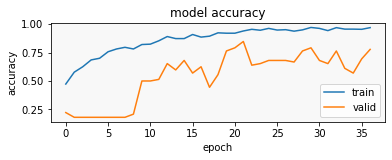

In [36]:
display_training_curves(history_res.history['acc'], history_res.history['val_acc'], 'accuracy', 212)

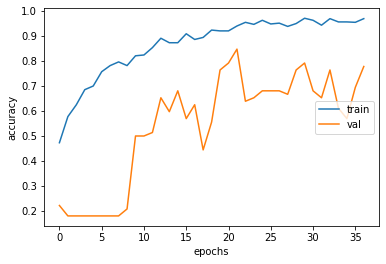

In [14]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [81]:
import keras
import tensorflow as tf

def chestScanPrediction(path, m):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
                                                          # Loading Image
    img = keras.utils.load_img(path, target_size=(305,430))
                                                           # Normalizing Image
    norm_img = tf.keras.preprocessing.image.img_to_array(img)
                                                           # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
                                                           # Getting Predictions
    pred = np.argmax(m.predict(input_arr_img))
     
    plt.imshow(img)
    plt.show()
    print(classes_dir[pred])                               # Printing Model Prediction

1/1 [==============================] - 0s 472ms/step


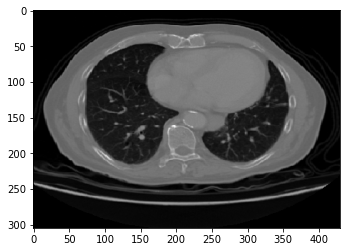

Normal


In [82]:
path = "../chest-cancer-dataset/Data/test/normal/000162.png"
chestScanPrediction(path,model)

1/1 [==============================] - 0s 381ms/step


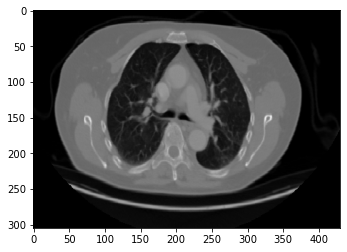

Adenocarcinoma


In [83]:
path = "../chest-cancer-dataset/Data/test/adenocarcinoma/000114.png"
chestScanPrediction(path,model)

1/1 [==============================] - 0s 367ms/step


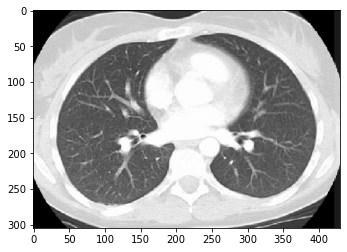

Large cell carcinoma


In [96]:
path = "../chest-cancer-dataset/Data/test/large.cell.carcinoma/l6.png"
chestScanPrediction(path,model)

1/1 [==============================] - 0s 380ms/step


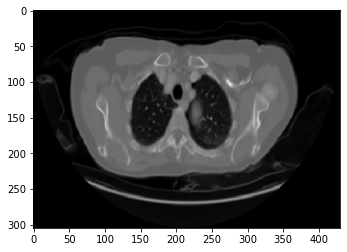

Adenocarcinoma


In [102]:
path = "../chest-cancer-dataset/Data/test/adenocarcinoma/000177.png"
chestScanPrediction(path,model)
